# Chapter6: Classification Glass

In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


### Upload csv

In [163]:
dfGlass = pd.read_csv('glass.csv')
dfGlass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [164]:
dfGlass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [165]:
# preprocessing
# split into test/train set

y = dfGlass["Type"]
x = dfGlass.drop("Type",axis=1)

from sklearn.model_selection import train_test_split
X_train, x_Test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=0)
# make data suitable for analysis

type(X_train)

pandas.core.frame.DataFrame

In [112]:
#transform to numpy thingies
#from sklearn.preprocessing import StandardScaler



## Logistic Regression


Fit different Logistic Regression models:
- Which variables to include

For each of those models:
- compare
- which on is the best
- How to interpret the model

worst model:54% best 85%

In [166]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='auto', max_iter=10000,solver='lbfgs') 

model with all dependent variables

In [167]:
logreg.fit(X_train,y_train)
score = logreg.score(x_Test,y_test)
print(score)

0.5370370370370371


In [168]:
scaler = StandardScaler()

Model with 1 dependent variable (mg)

In [172]:
#X_train2 = X_train.values.reshape(-1,1)
#logreg2 = LogisticRegression(multi_class='auto', max_iter=10000,solver='lbfgs') 
#logreg2.fit(X_train2['Mg'],y_train)
#score = logreg.score(x_Test,y_test)
#print(score)
#keep or no
scaler = StandardScaler()
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(multi_class='auto', max_iter=10000,solver='lbfgs'), step=1, cv=6, scoring='accuracy')
rfecv.fit(X_train,y_train)

RFECV(cv=6, estimator=LogisticRegression(max_iter=10000), scoring='accuracy')

## Decision Trees

Fit different Logistic Regression models:
- Which variables to include -> Is this useful?
- Determine stopping criteria?

For each of those models:
- compare
- which on is the best
- How to interpret the model

Model:63%

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fit = dtree.fit(X_train,y_train)
score = dtree_fit.score(x_Test,y_test)
predictions = dtree.predict(x_Test)
print(score)

0.6296296296296297


In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.60      0.64      0.62        14
           2       0.71      0.62      0.67        24
           3       0.17      0.20      0.18         5
           5       0.50      1.00      0.67         2
           6       0.50      0.50      0.50         2
           7       1.00      0.86      0.92         7

    accuracy                           0.63        54
   macro avg       0.58      0.64      0.59        54
weighted avg       0.66      0.63      0.64        54



[[ 9  3  2  0  0  0]
 [ 4 15  3  1  1  0]
 [ 2  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  1  0  6]]


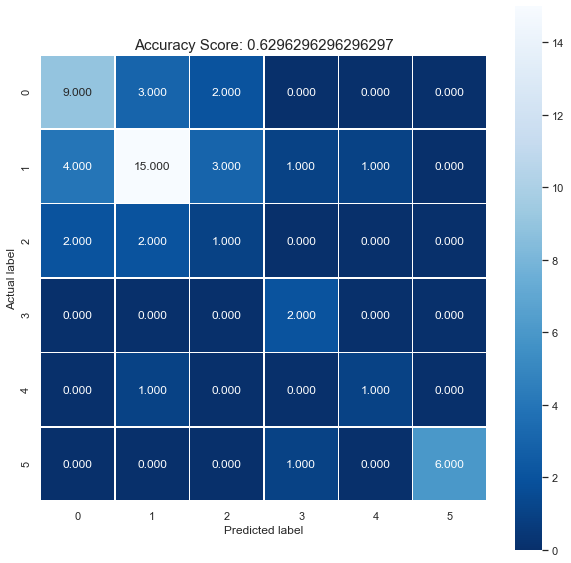

In [73]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

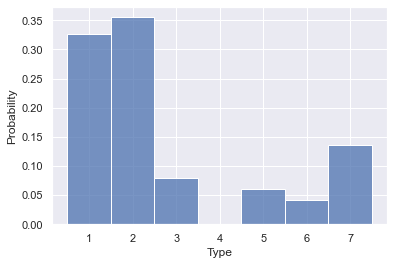

In [79]:
sns.histplot(dfGlass, x="Type", stat="probability", discrete=True)


## K Nearest Neighbor

Fit different Logistic Regression models:
- Which variables to include -> Is this useful?
- Determine hyperparameter?

For each of those models:
- compare
- which on is the best
- How to interpret the model

In [175]:
from sklearn.neighbors import KNeighborsClassifier

def fit_k_nearest_neighbors(k):
    knm = KNeighborsClassifier(n_neighbors = k)
    knm.fit(X_train,y_train)
    score = knm.score(x_Test,y_test)
    print(score)
    

for k in range(10):
    print(k+1)
    fit_k_nearest_neighbors(k+1)
    
#result_array = np.array([[1],[0]])
#for k in range(10):
#    np.insert(results_array[0], k+1)
#    np.insert(results_array[1], fit_k_nearest_neigbors(l+1))


1
0.7037037037037037
2
0.6296296296296297
3
0.6296296296296297
4
0.6296296296296297
5
0.6481481481481481
6
0.6666666666666666
7
0.6481481481481481
8
0.6296296296296297
9
0.6481481481481481
10
0.6296296296296297


## Conclusion
Which model is the best? How do I interpret this model?

Logistic Regression: 57%
Decision Trees: 63%
K Nearest Neighbors: 66%